# Interactive Dashboard

In [20]:
import sys
import pandas as pd
import importlib
import numpy as np
import os
sys.path.append("222_models")
%config InlineBackend.figure_format = 'retina'

In [2]:
sales = pd.read_csv('111_input_data/sales.csv',parse_dates=['Date'], date_format='%Y-%m')

In [3]:
sales

,Date,Material,Kunde,Sale
0,2024-06-01,24386,101068,0.238
1,2024-07-01,24386,101068,0.950
2,2024-08-01,24386,101068,0.872
3,2024-09-01,24386,101068,0.158
4,2024-10-01,24386,101068,0.632
...,...,...,...,...
245463,2024-08-01,41925,9966108026,0.000
245464,2024-09-01,41925,9966108026,0.000
245465,2024-10-01,41925,9966108026,0.000
245466,2024-11-01,41925,9966108026,0.000


In [8]:
import WHCT_model
import WHCST_model
import mean_model
import model_utils

In [5]:
model_utils.load_dyn_cov('weather.csv', 'Date', 'temperature_air_mean_2m', Ort='Lübeck')

['Date', 'temperature_air_mean_2m']


,Date,temperature_air_mean_2m
264,2014-01-01,1.13
265,2014-02-01,4.82
266,2014-03-01,6.72
267,2014-04-01,10.04
268,2014-05-01,12.46
...,...,...
390,2024-08-01,18.65
391,2024-09-01,15.48
392,2024-10-01,10.70
393,2024-11-01,6.06


In [6]:
model_utils.load_dyn_cov('holidays.csv', 'Date', 'Feiertage', 'Bundesland', Bundesland='BY')

['Date', 'Feiertage', 'Bundesland']


,Date,Feiertage,Bundesland
435,2014-01-01,2,BY
436,2014-02-01,0,BY
437,2014-03-01,0,BY
438,2014-04-01,2,BY
439,2014-05-01,2,BY
...,...,...,...
575,2025-09-01,0,BY
576,2025-10-01,1,BY
577,2025-11-01,1,BY
578,2025-12-01,2,BY


## Training
Training is done via train function in corresponding model files

In [9]:
mean_model.train(10015,111144,sales)

/home/ea2226/anaconda3/envs/pymc_env/lib/python3.12/site-packages/pymc/data.py:304: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, h]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Sampling: [likelihood]


Output()

Sampling: [likelihood]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

In [45]:
import vis_utils
importlib.reload(vis_utils)

<module 'vis_utils' from '/home/ea2226/Code/240906-AlanVagner-ProbabilisticForecastModels-MT/40_Realisation/222_models/vis_utils.py'>

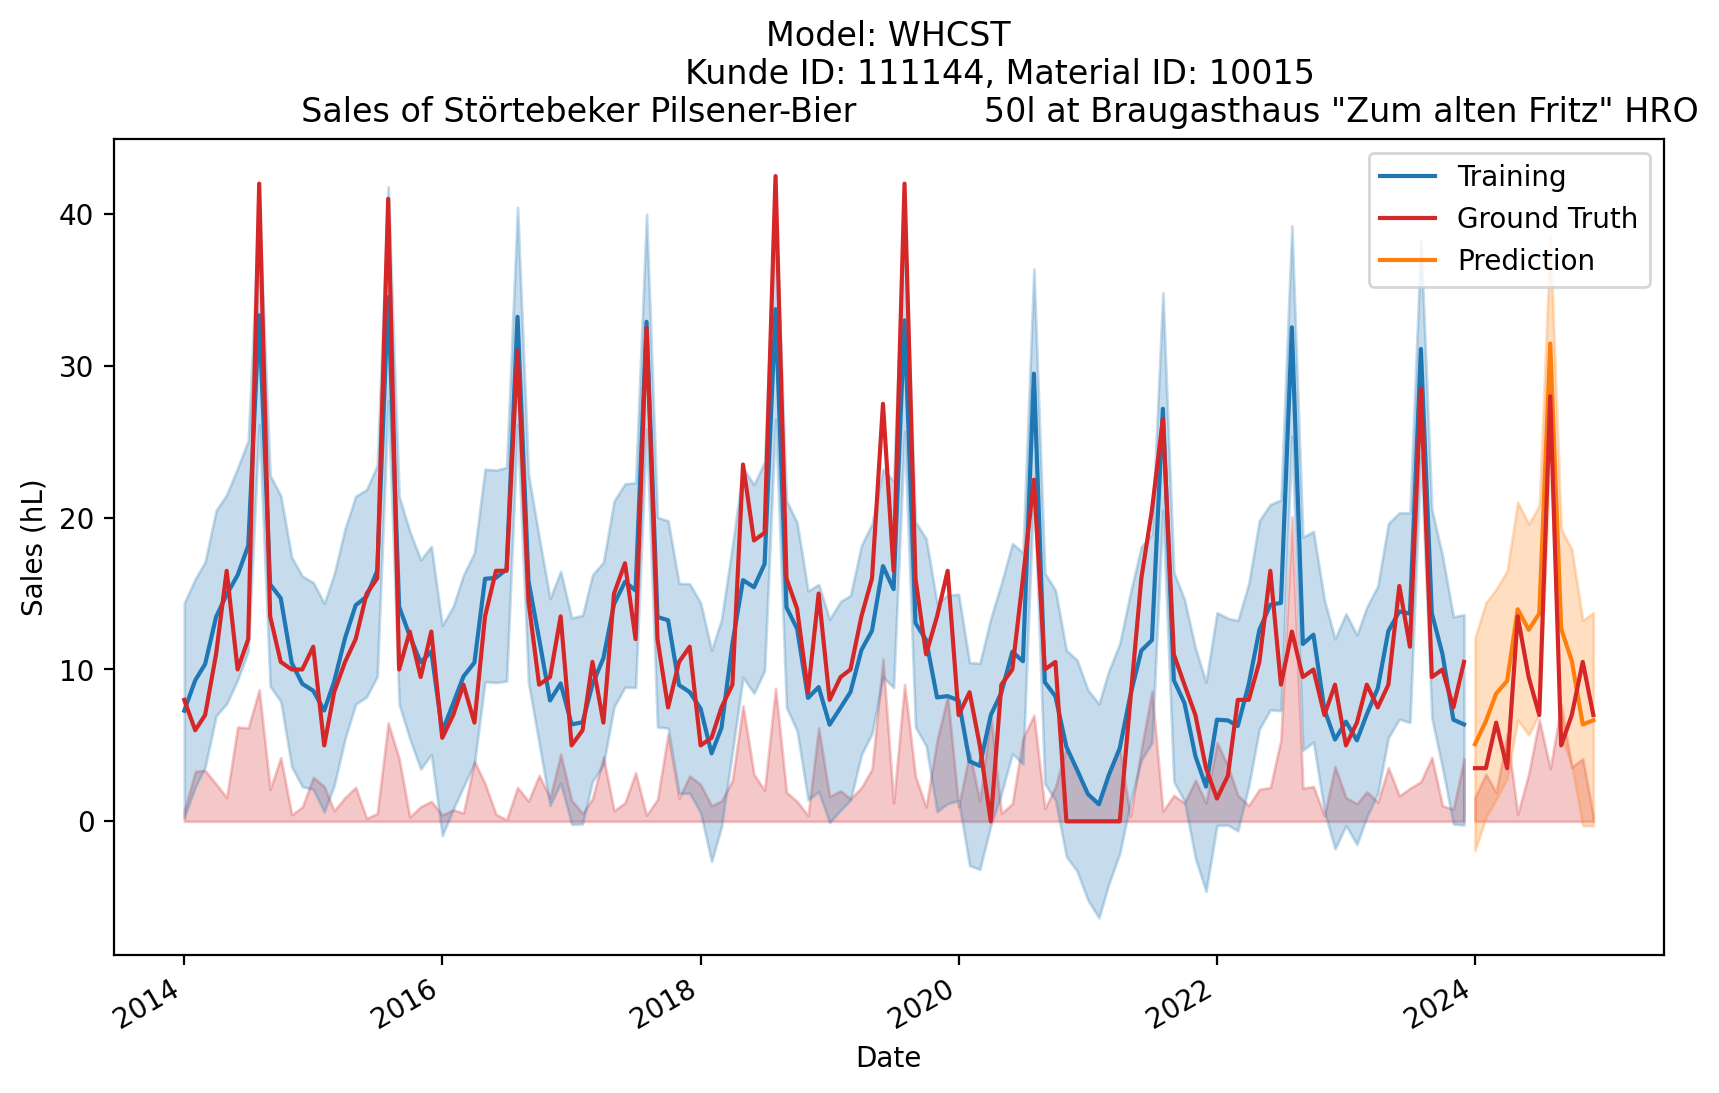

,alpha,beta,cov_h,hol_h,sail_h,sigma,w_h
0,0.154,-0.0888,-0.0883,0.0394,0.4034,0.0963,0.2808


In [14]:
vis_utils.plot("333_output_data/WHCST_10015_111144.h5",sales)
vis_utils.load_means_from_h5("333_output_data/WHCST_10015_111144.h5")

In [15]:

WHCT_model.train(34600,101068,sales)

['Date', 'temperature_air_mean_2m', 'Ort']
['Date', 'Feiertage', 'Bundesland']
['Date', 'Covid']


/home/ea2226/anaconda3/envs/pymc_env/lib/python3.12/site-packages/pymc/data.py:304: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, cov_h, w_h, hol_h, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Sampling: [likelihood]


Output()

Sampling: [likelihood]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

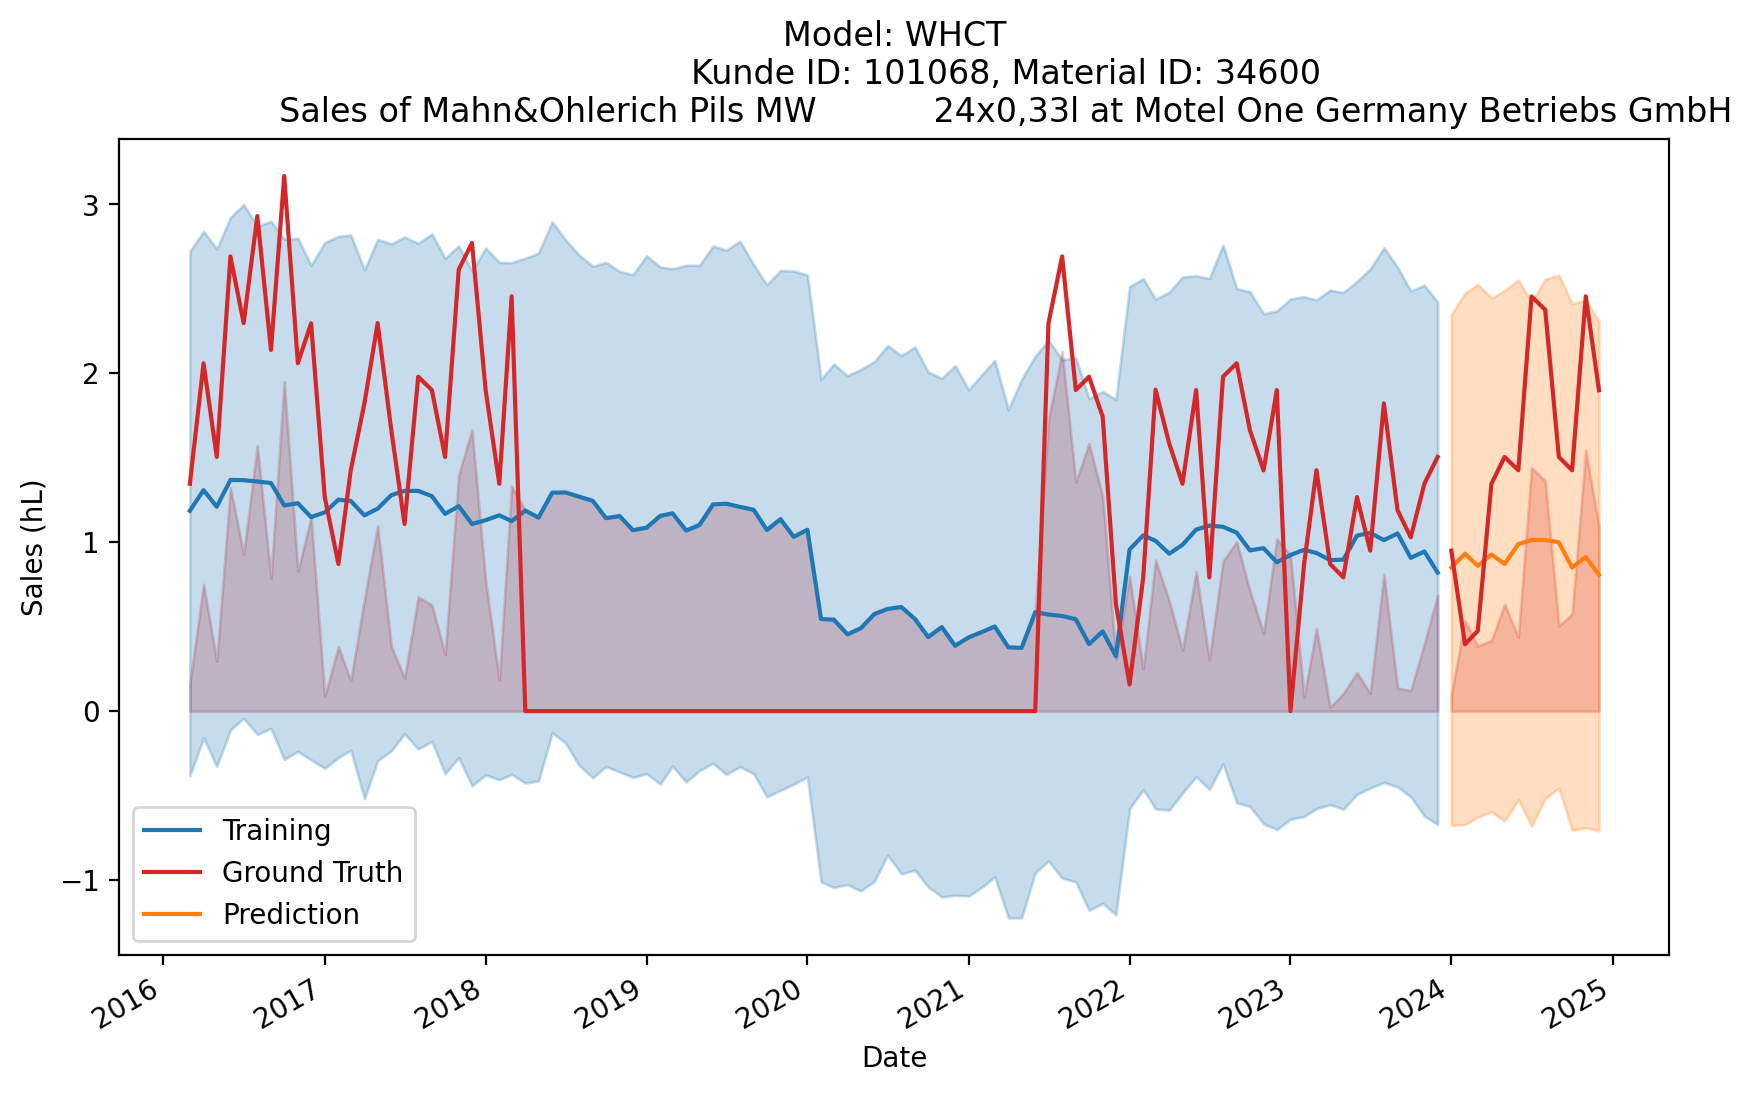

,alpha,beta,cov_h,hol_h,sigma,w_h
0,0.3936,-0.1238,-0.1825,-0.042,0.2868,0.047


In [16]:
vis_utils.plot("333_output_data/WHCT_34600_101068.h5",sales)
vis_utils.load_means_from_h5("333_output_data/WHCT_34600_101068.h5")

In [100]:
WHCT_model.train(10015,111144,sales)
WHCST_model.train(10015,111144,sales)

/home/ea2226/miniconda3/envs/pymc_env/lib/python3.12/site-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...


['Date', 'temperature_air_mean_2m', 'Ort']
['Date', 'Feiertage', 'Bundesland']
['Date', 'Covid']


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, cov_h, w_h, hol_h, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Sampling: [likelihood]


Output()

Sampling: [likelihood]


Output()

/home/ea2226/miniconda3/envs/pymc_env/lib/python3.12/site-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...


['Date', 'temperature_air_mean_2m', 'Ort']
['Date', 'Feiertage', 'Bundesland']
['Date', 'Covid']
['Date', 'Sail']


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, cov_h, w_h, hol_h, sail_h, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Sampling: [likelihood]


Output()

Sampling: [likelihood]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

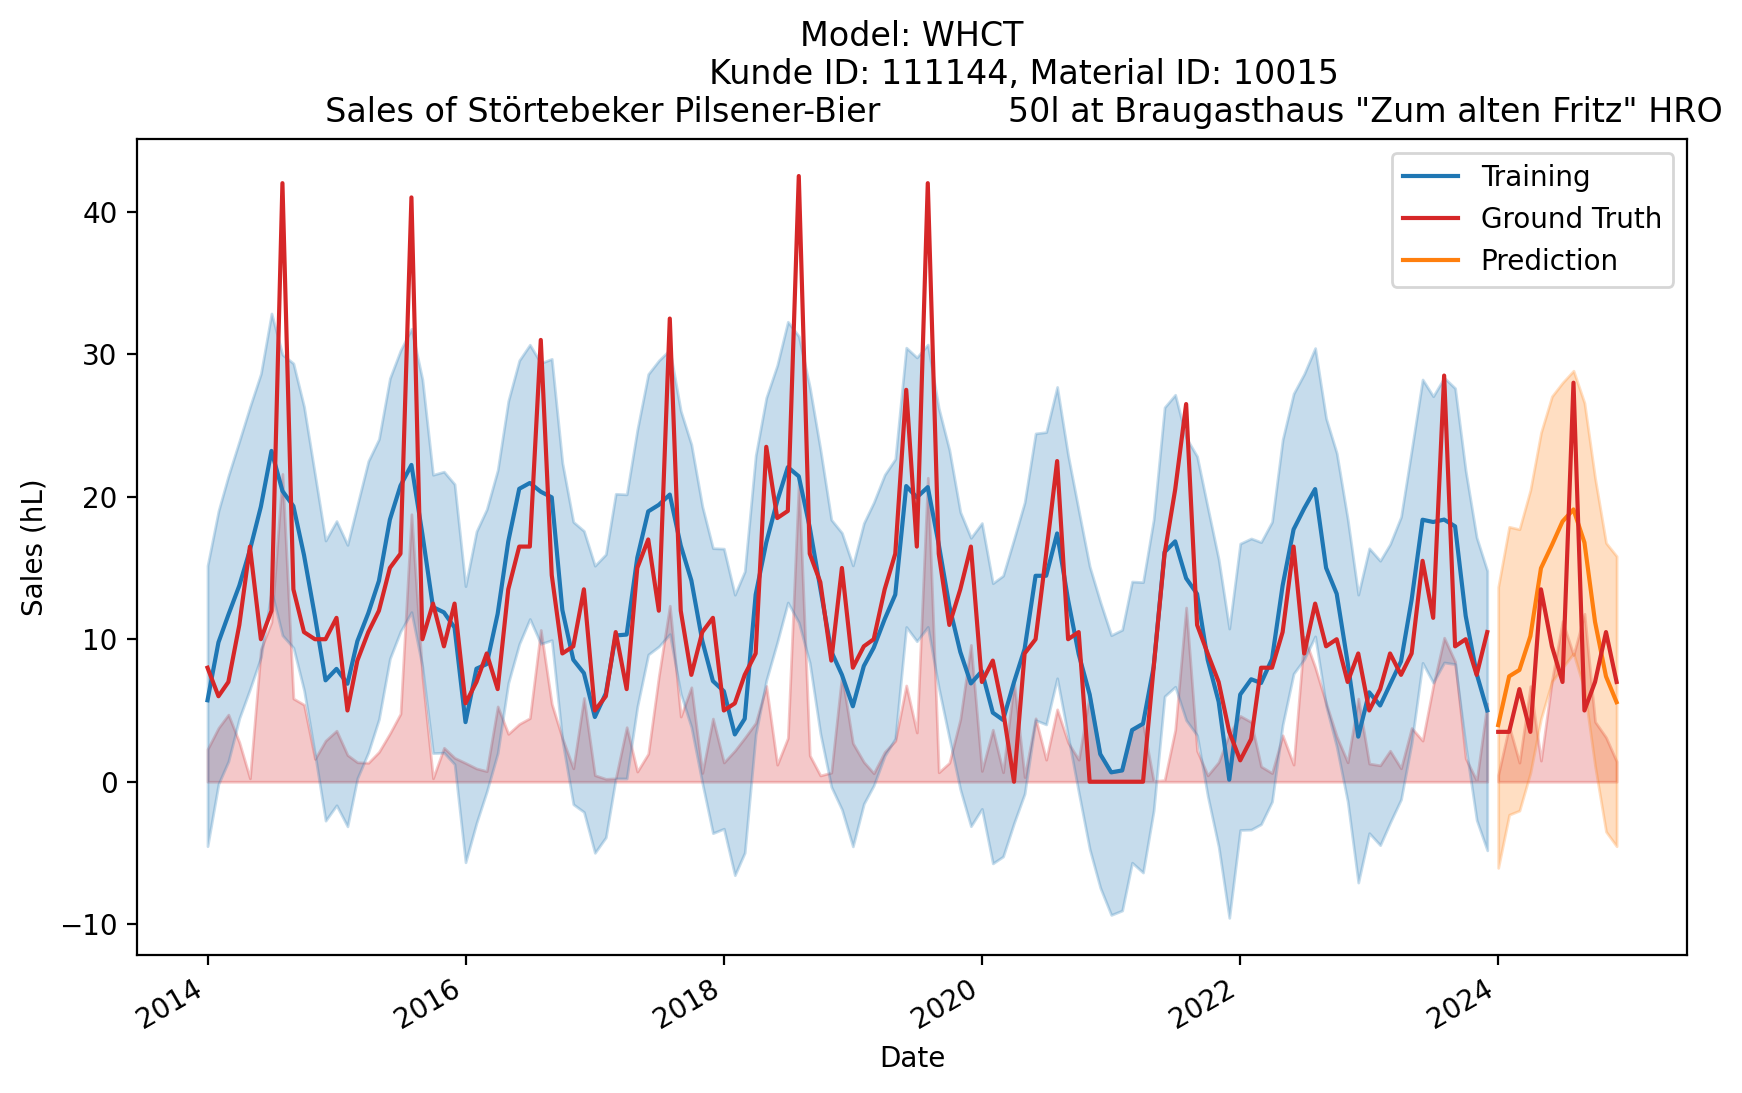

,alpha,beta,cov_h,hol_h,sigma,w_h
0,0.1349,-0.0888,-0.088,-0.0226,0.1396,0.4202


In [101]:
vis_utils.goodplot("333_output_data/WHCT_10015_111144.h5",sales)
vis_utils.load_means_from_h5("333_output_data/WHCT_10015_111144.h5")

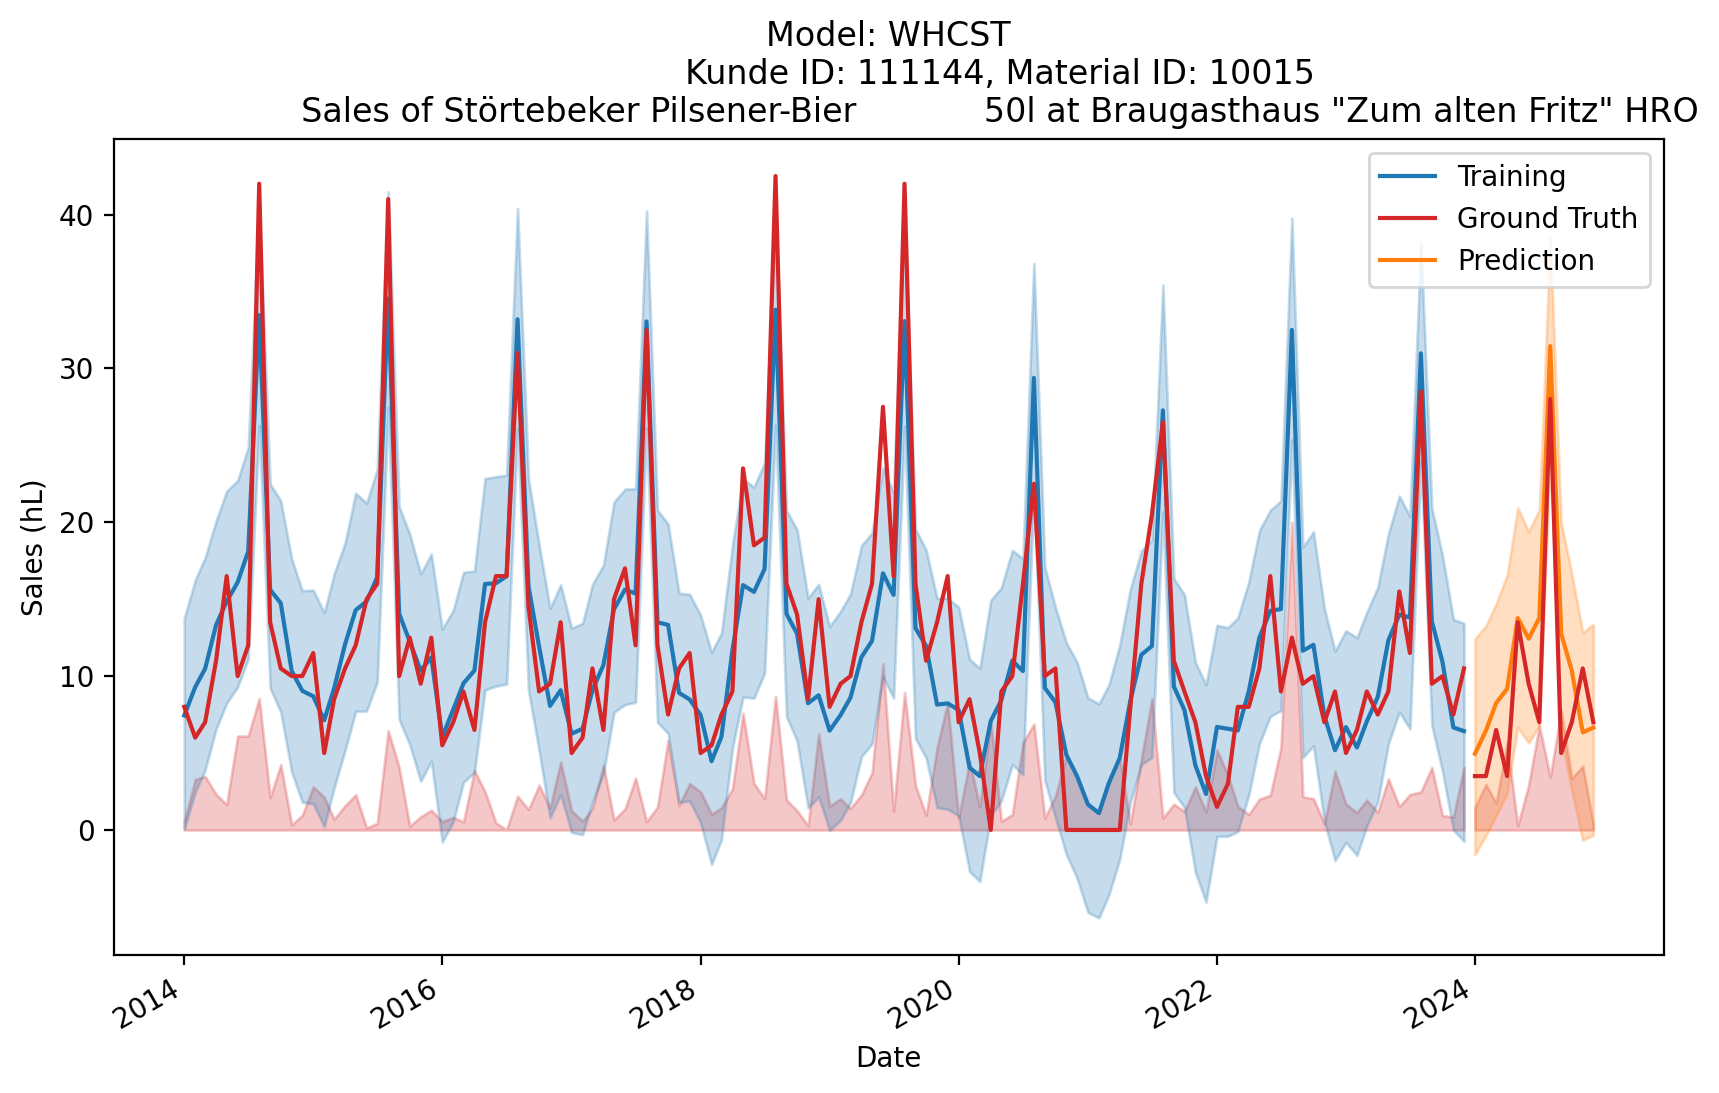

,alpha,beta,cov_h,hol_h,sail_h,sigma,w_h
0,0.1544,-0.0902,-0.088,0.0391,0.4039,0.0964,0.281


In [104]:
vis_utils.plot("333_output_data/WHCST_10015_111144.h5",sales)
vis_utils.load_means_from_h5("333_output_data/WHCST_10015_111144.h5")

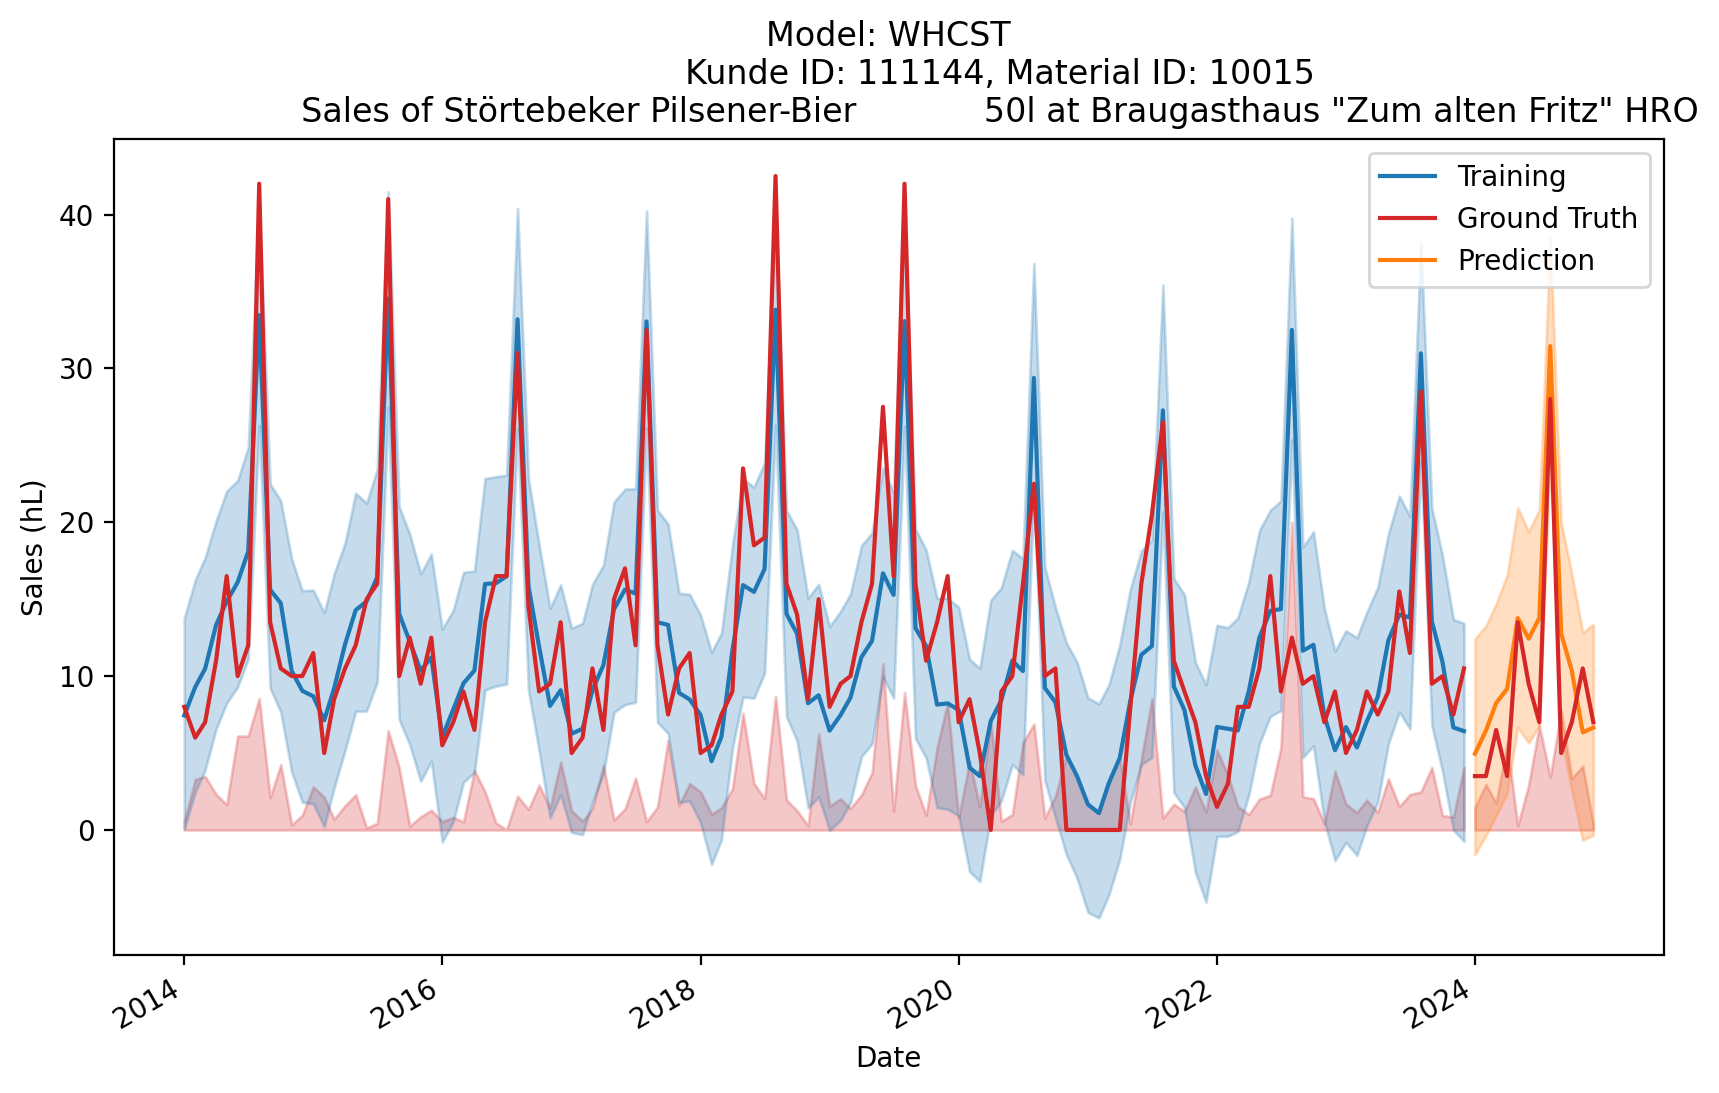

In [117]:
vis_utils.plot("333_output_data/WHCST_10015_111144.h5",sales)

## Violin plots

In [46]:
results = {}

In [47]:
model_name = "WHCST"

folder_path = "333_output_data"
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):  # Ensure it's a file and not a folder
        try:
            obj = vis_utils.load_from_hdf5(file_path)
            if obj['model_name'] == model_name:
                results[str(obj['material_name']) +"_"+ str(obj['customer_name'])] = obj
                print(file_name)
        except e:
            print("Error "+file_path)

WHCST_20526_111144.h5
WHCST_57978_101068.h5
WHCST_20102_111144.h5
WHCST_11341_181570.h5
WHCST_66165_111144.h5
WHCST_257166_101068.h5
WHCST_85601_181570.h5
WHCST_33700_182514.h5
WHCST_33145_101068.h5
WHCST_68127_182306.h5
WHCST_20106_111144.h5
WHCST_83395_181570.h5
WHCST_77508_182306.h5
WHCST_83365_181570.h5
WHCST_12111_181570.h5
WHCST_55173_111144.h5
WHCST_66145_111144.h5
WHCST_34005_182514.h5
WHCST_77030_181880.h5
WHCST_87140_181880.h5
WHCST_77005_182306.h5
WHCST_45015_101068.h5
WHCST_285132_181570.h5
WHCST_55420_101068.h5
WHCST_77025_101068.h5
WHCST_38206_181570.h5
WHCST_230215_181880.h5
WHCST_20103_111144.h5
WHCST_51181_181880.h5
WHCST_85602_181570.h5
WHCST_20978_111144.h5
WHCST_11190_181880.h5
WHCST_66175_111144.h5
WHCST_77006_181880.h5
WHCST_287092_111144.h5
WHCST_23204_182306.h5
WHCST_10023_111144.h5
WHCST_77080_181880.h5
WHCST_255269_111144.h5
WHCST_20516_111144.h5
WHCST_45005_101068.h5
WHCST_55395_181570.h5
WHCST_50306_182514.h5
WHCST_77045_101068.h5
WHCST_59762_101068.h5
WHCST

/home/ea2226/Code/240906-AlanVagner-ProbabilisticForecastModels-MT/40_Realisation/222_models/vis_utils.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



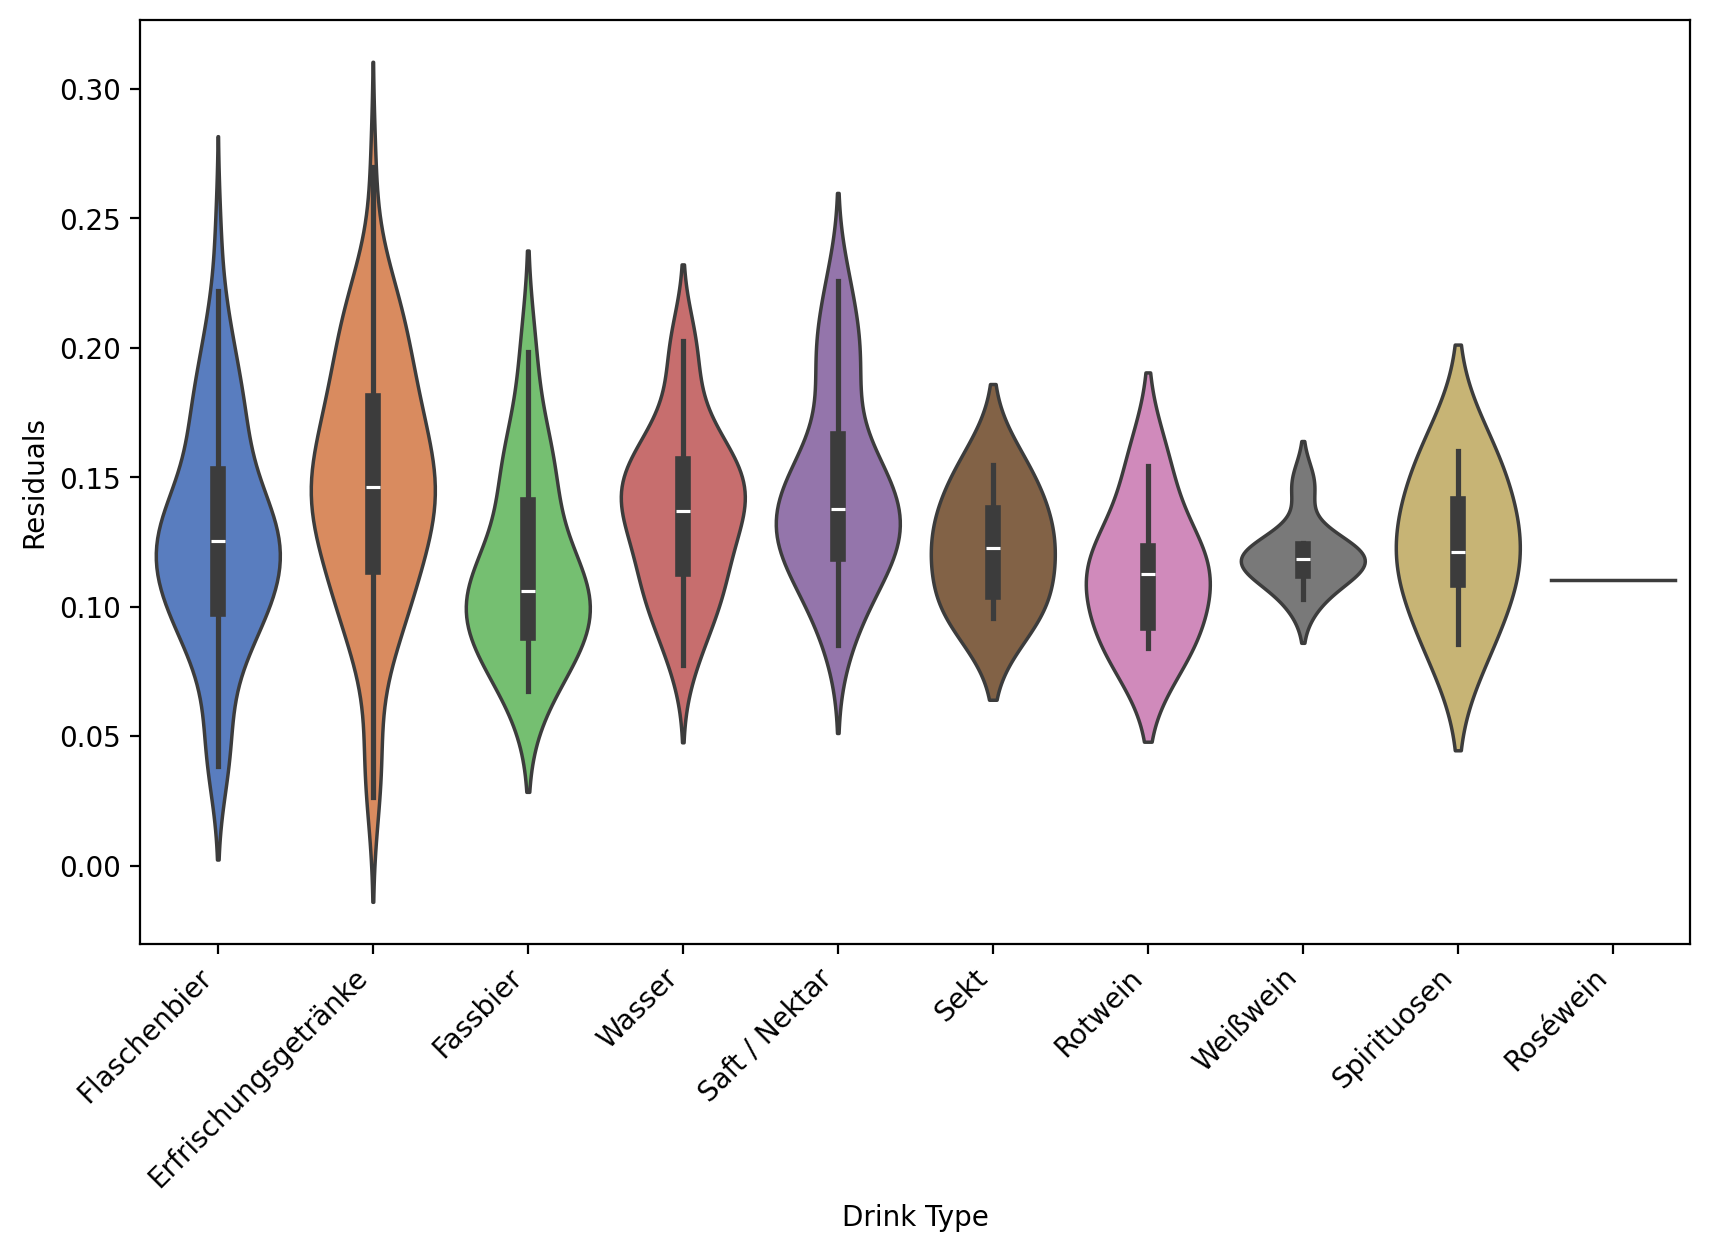

,Drink Type,Residuals
0,Flaschenbier,0.158580
1,Erfrischungsgetränke,0.211378
2,Flaschenbier,0.113882
3,Fassbier,0.149017
4,Wasser,0.136029
...,...,...
281,Flaschenbier,0.135885
282,Flaschenbier,0.158410
283,Weißwein,0.124785
284,Flaschenbier,0.102496


In [48]:
vis_utils.plot_violins(results, sales, 'Type', "Material", "Drink Type")

/home/ea2226/Code/240906-AlanVagner-ProbabilisticForecastModels-MT/40_Realisation/222_models/vis_utils.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



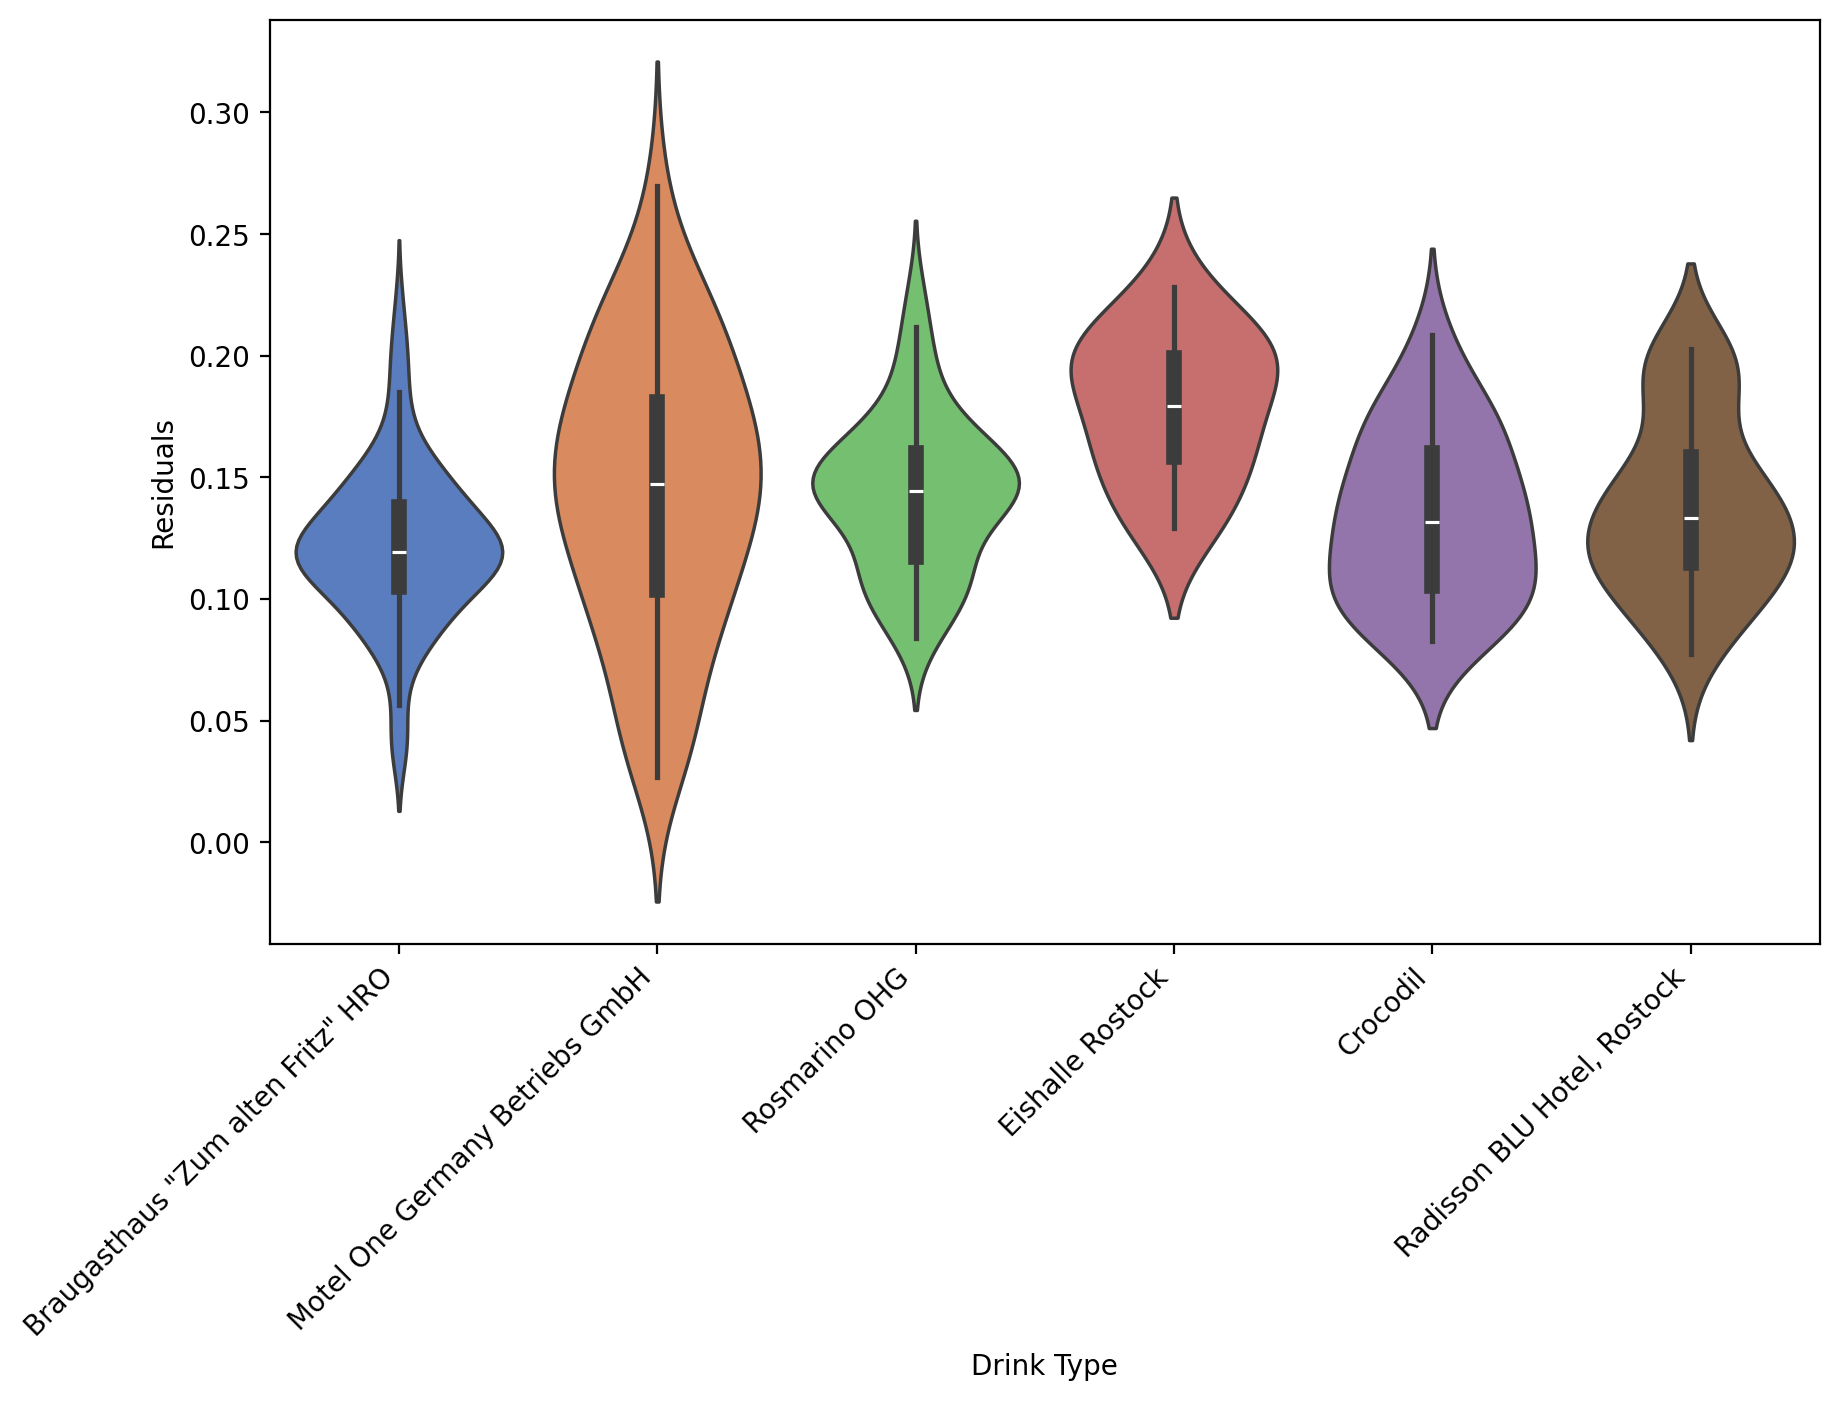

,Drink Type,Residuals
0,"Braugasthaus ""Zum alten Fritz"" HRO",0.158580
1,Motel One Germany Betriebs GmbH,0.211378
2,"Braugasthaus ""Zum alten Fritz"" HRO",0.113882
3,Rosmarino OHG,0.149017
4,"Braugasthaus ""Zum alten Fritz"" HRO",0.136029
...,...,...
281,Crocodil,0.135885
282,Eishalle Rostock,0.158410
283,"Braugasthaus ""Zum alten Fritz"" HRO",0.124785
284,Crocodil,0.102496


In [49]:
vis_utils.plot_violins(results, sales, 'Name', "Kunde", "Drink Type")